In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [124]:
ds_xlsx = pd.read_excel("..\Assets\dry_bean_dataset\Raisin_Dataset\Raisin_Dataset.xlsx")
data =  pd.DataFrame(ds_xlsx)

In [139]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [140]:
max_depths = range(2, 9)
avg_errors_tree = []

for max_depth in max_depths:
    errors = []
    for train_index, test_index in kf.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        X_train, y_train = train_data.drop("Class", axis=1), train_data["Class"]
        X_test, y_test = test_data.drop("Class", axis=1), test_data["Class"]
        
        
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(X_train, y_train)
        
        
        y_pred = clf.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
    
    avg_error = np.mean(errors)
    avg_errors_tree.append(avg_error)

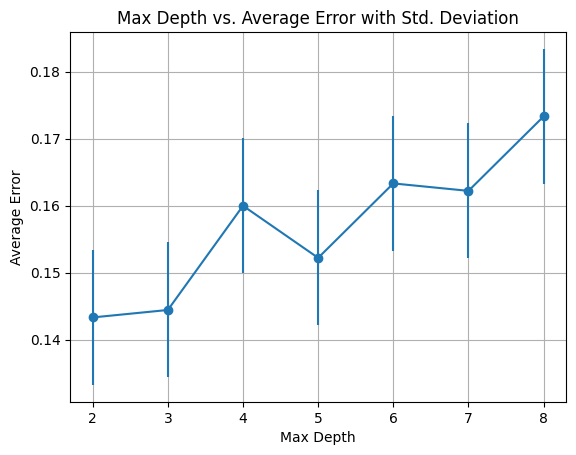

In [141]:
std_dev = np.std(avg_errors_tree, axis=0)

plt.errorbar(max_depths, avg_errors_tree, yerr=std_dev, marker='o', linestyle='-')
plt.xlabel("Max Depth")
plt.ylabel("Average Error")
plt.title("Max Depth vs. Average Error with Std. Deviation")
plt.grid(True)
plt.show()

In [142]:
k_values = range(3, 16, 2)
avg_errors_knn = []

# Iterate through K values
for k in k_values:
    errors = []
    knn = KNeighborsClassifier(n_neighbors=k)
    
    for train_index, test_index in kf.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        X_train, y_train = train_data.drop("Class", axis=1), train_data["Class"]
        X_test, y_test = test_data.drop("Class", axis=1), test_data["Class"]
        X_train = X_train.to_numpy()
        X_test = X_test.to_numpy()
        
        # Create and train the KNN classifier
        knn.fit(X_train, y_train)
        
        # Make predictions and calculate error
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)
    
    avg_error = np.mean(errors)
    avg_errors_knn.append(avg_error)

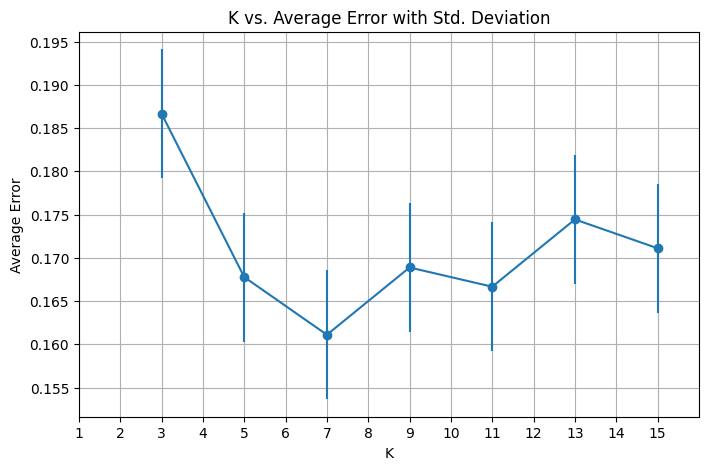

In [143]:
std_dev_knn = np.std(avg_errors_knn)

plt.figure(figsize=(8, 5))
plt.errorbar(k_values, avg_errors_knn, yerr=std_dev_knn, marker='o', linestyle='-')
plt.xlabel("K")
plt.ylabel("Average Error")
plt.title("K vs. Average Error with Std. Deviation")
plt.grid(True)
plt.xticks(range(16))
plt.xlim(1, 16)
plt.show()